<a href="https://colab.research.google.com/github/rahool010/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [51]:
# importing python libraries that would help us immensely during our endeavour
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to not get tensed over unnecessary warnings we will ignore them
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [52]:
# loading the dataset
directory_path="/content/drive/MyDrive/dataset/SeoulBikeData.csv"  
seoul_df=pd.read_csv(directory_path,encoding= 'unicode_escape')

# Note: Please change the directory path where the file is stored while running in your system.

In [53]:
# lets check the first 5 and last 5 observations
seoul_df.head().append(seoul_df.tail())

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [54]:
# check the shape
seoul_df.shape

(8760, 14)

In [55]:
# finding the types of data in each column
seoul_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

The dataset has 3 types of data namely: Integer, float, strings/objects

In [56]:
# printing unique values of each column 
for col in seoul_df.columns:
  print(f"{col}: \t{seoul_df[col].nunique()}")

Date: 	365
Rented Bike Count: 	2166
Hour: 	24
Temperature(°C): 	546
Humidity(%): 	90
Wind speed (m/s): 	65
Visibility (10m): 	1789
Dew point temperature(°C): 	556
Solar Radiation (MJ/m2): 	345
Rainfall(mm): 	61
Snowfall (cm): 	51
Seasons: 	4
Holiday: 	2
Functioning Day: 	2


In [57]:
seoul_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


# **1. Exploratory Data Analysis**

## Univariate analysis

<b> 1. "Rental Bike Count" - Dependent variable(dv)

In [58]:
# descriptive stats of dv
seoul_df['Rented Bike Count'].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

It looks like their might be some outliers in our variable if we observe the min, max, 25% and 75% values. 

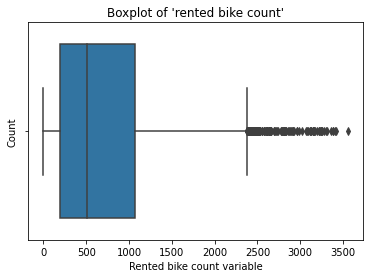

In [59]:
# checking the outliers using boxplot
sns.boxplot(seoul_df['Rented Bike Count'])
plt.xlabel('Rented bike count variable')
plt.ylabel('Count')
plt.title("Boxplot of 'rented bike count'")
plt.show()

There are lot of outliers on the maximum side(above ~2500). We will deal with them later in this analysis. Let us now check the distribution of our variable.

In [60]:
import scipy.stats as stats
def plot_feature(df, feature):
  plt.figure(figsize=(12,6))
  plt.subplot(1,2,1)

  #skewness and kurtosis
  print("Skewness: %f" % df[feature].skew())
  print("Kurtosis: %f" % df[feature].kurt())

  sns.distplot(df['Rented Bike Count'])

  ##Prob plot
  plt.subplot(1,2,2)
  stats.probplot(df[feature], dist="norm", plot=plt)
  plt.show()

Skewness: 1.153428
Kurtosis: 0.853387


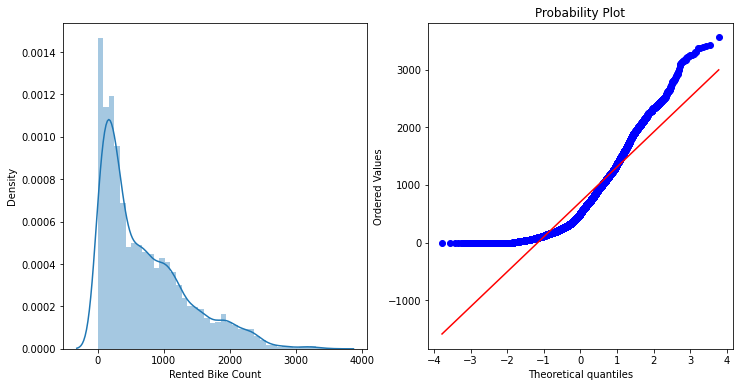

In [61]:
# plot distribution and probability plot
plot_feature(seoul_df,'Rented Bike Count')

Our dependant variable is positively skewed having value 1.153 and has peakedness of 0.853. Let's take square root of our dv and draw the plot. It will give us more clarification about data and we can visualize in a better way

In [62]:
# # square root transformation - much better transformation reduces skewness
# seoul_df['Rented Bike Count'] = np.sqrt(seoul_df['Rented Bike Count'])

In [63]:
# # plot distribution and probability plot
# plot_feature(seoul_df,'Rented Bike Count')

Instead of removing the outlier, we have applied square root transformation on our dependant variable to shrink the values and make the data more normally distributed. Now ou dv somewhat resembles a normal distribution. Now we dont have to take care of the outliers as transformation has done the job for us.

Note: One should proceed with caution when considering to remove observations from the data. In many cases, there is a valid reason for these observations to exist.

**Date**

It is a numerical variable which tells us the date of bookings. Let us see the count of how many days we have. For that we will try to separate the date column into days, months and years.

In [64]:
# Converting date column to DateTime type
# extract day, month and year from 'Date'
seoul_df['Date'] = pd.to_datetime(seoul_df['Date'])
seoul_df['Day'] = seoul_df['Date'].dt.day
seoul_df['Month'] = seoul_df['Date'].dt.month
seoul_df['Year'] = seoul_df['Date'].dt.year

In [65]:
# checking no of years
seoul_df['Year'].value_counts()

2018    8016
2017     744
Name: Year, dtype: int64

In [66]:
# printing unique values of each column 
for col in seoul_df.columns:
  print(f"{col}: \t{seoul_df[col].nunique()}")

Date: 	365
Rented Bike Count: 	2166
Hour: 	24
Temperature(°C): 	546
Humidity(%): 	90
Wind speed (m/s): 	65
Visibility (10m): 	1789
Dew point temperature(°C): 	556
Solar Radiation (MJ/m2): 	345
Rainfall(mm): 	61
Snowfall (cm): 	51
Seasons: 	4
Holiday: 	2
Functioning Day: 	2
Day: 	31
Month: 	12
Year: 	2


In [67]:
# creating a list of categorical variables
cat_var = ['Functioning Day','Holiday','Seasons','Year','Month','Day']

In [68]:
# creating a list of numerical variable
num_var = ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

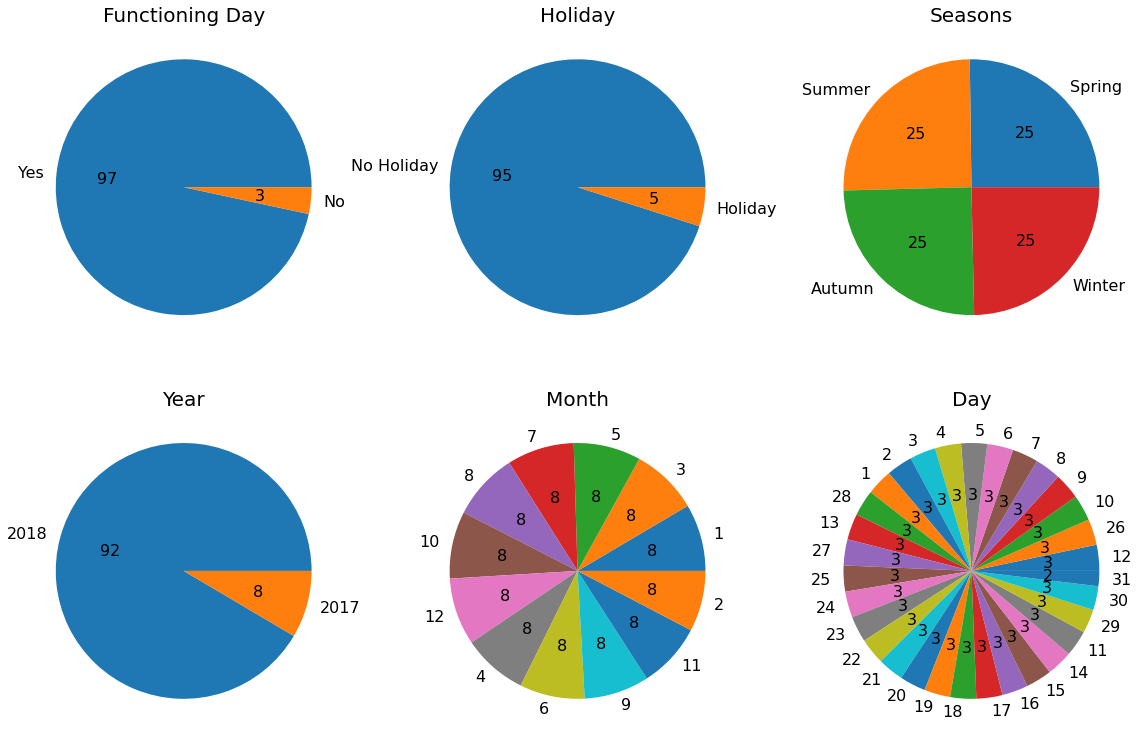

In [69]:
plt.figure(figsize=(20,20))
for i, col in enumerate(cat_var):
    plt.subplot(3,3,i+1)
    seoul_df[col].value_counts().plot(kind = 'pie', fontsize=16, autopct='%.0f')
    plt.ylabel('')
    plt.title(col,fontsize=20)
plt.show()

* In Function Day, majority class is 'Yes' for this variabe. And almost 3% No.
* Again, for Holiday variable majority class is 'No Holiday' and only 5% is 'Holiday' class.
* In Seasons variable, we have an equal proportion of each of the seasons. We will see if it has any effect on our dependant variable in our multivariate analysis and if it does, will surely encode this in our prediction model.
* Most of the data if from year 2018.
* We have almost equal number of for each month.
* We have equal number of observations for each with little less observations for last days of months.


In [70]:
# creating a list of numerical variable
num_var = ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

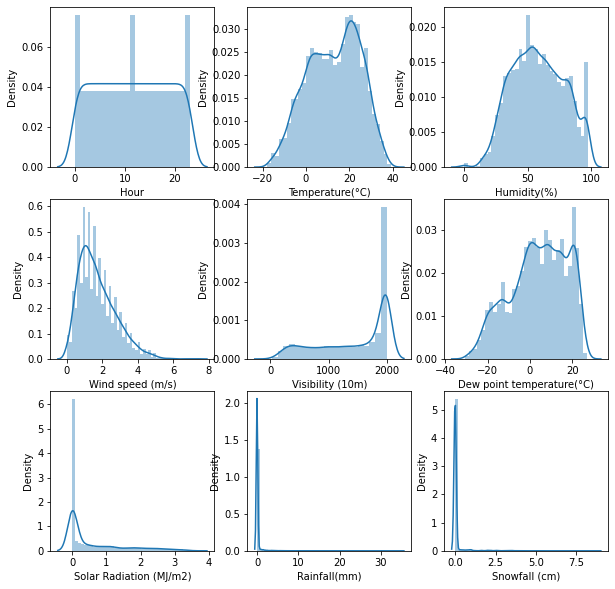

In [71]:
# checking the distribution
plt.figure(figsize=(10,10))
for index,item in enumerate(num_var):
  plt.subplot(3,3,index+1)
  sns.distplot(seoul_df[item])

**Observations**

Most of the distribution are not normal. Also variable such as rainfall and snowfall  have almost all zeroes. Variables such as visibility and solar radiation are skewed.

In [72]:
seoul_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

## Multivariate Analysis

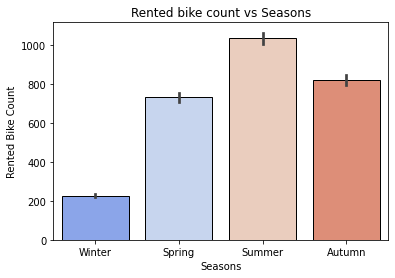

In [73]:
# checking the mean rented bike count in each season
sns.barplot(x='Seasons', y='Rented Bike Count', data=seoul_df,
            palette='coolwarm', edgecolor='k')
plt.title('Rented bike count vs Seasons')
plt.show()

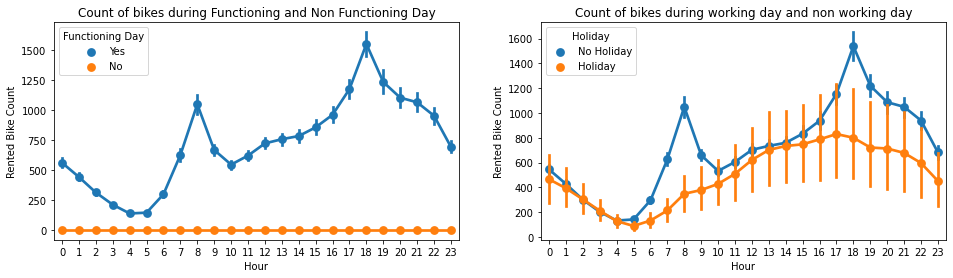

In [74]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

sns.pointplot(x='Hour',y='Rented Bike Count',hue='Functioning Day', data=seoul_df, ax=ax1)
ax1.set_title('Count of bikes during Functioning and Non Functioning Day')

sns.pointplot(x='Hour',y='Rented Bike Count',hue='Holiday', data=seoul_df, ax=ax2)
ax2.set_title('Count of bikes during working day and non working day')

plt.show()


* People don't use rented bikes in non functioning day.
* During working days there is a high demand around the 8th hour and 18th hour. There is a lower demand during 0 to 5th hour and 10 to 14th hour.
In the non workin days, there is a high demand for rented bike during 14 to 20th hour.

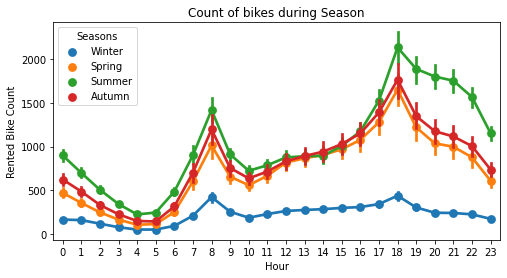

In [75]:
# Anlysis of seasonal variation by using pointplot
plt.figure(figsize=(8,4))
sns.pointplot(data=seoul_df, x='Hour', y='Rented Bike Count', hue='Seasons')
plt.title('Count of bikes during Season')
plt.show()

The point plot above shows the use of reted bike in four different seasons.
* In the summer season the demand of rented bike is high and peak time is 7am to 9am and 5pm to 7pm.
* In winter season of the demand of rented bike is very less because of snowfall.

**All numerical features**

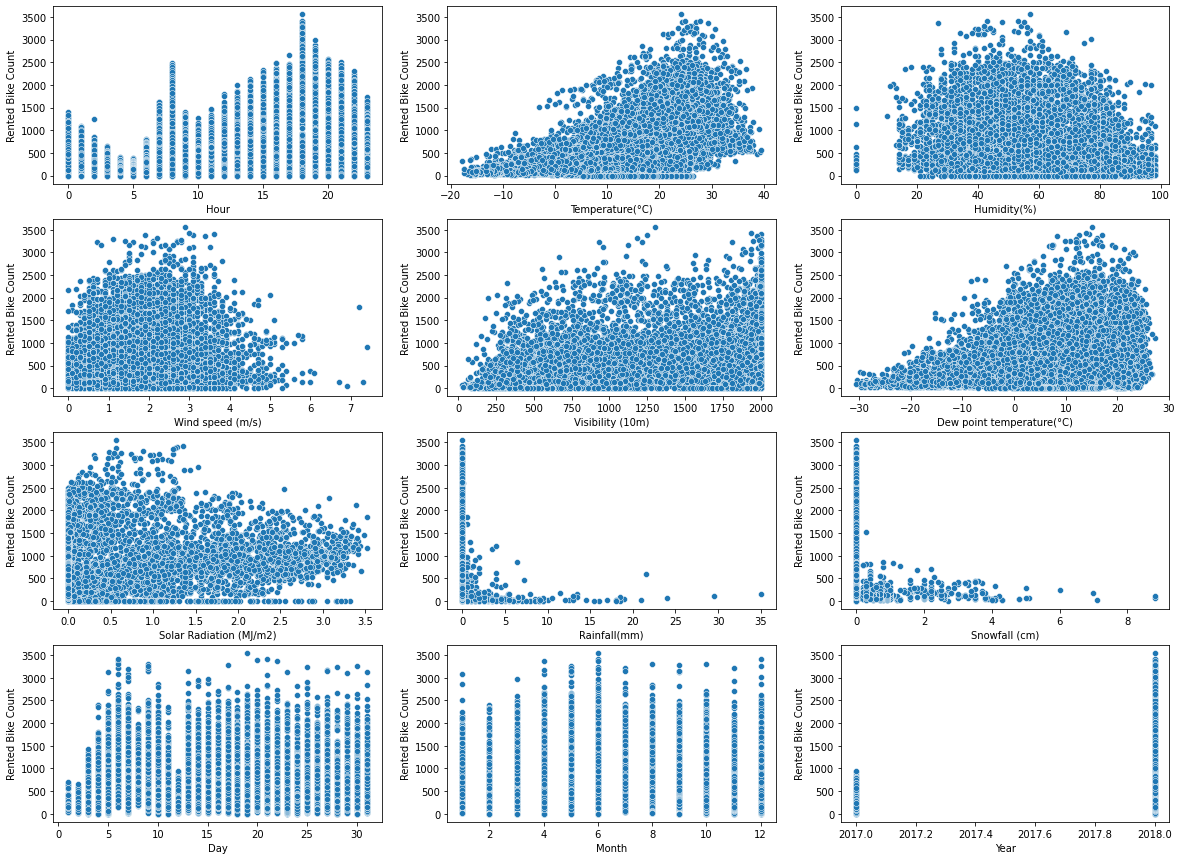

In [76]:
# creating a list of nv we need
list2=[i for i in seoul_df.describe().columns.to_list() if i not in ['Rented Bike Count']]

# running a for loop over list2
plt.figure(figsize=(20,15))
for index,i in enumerate(list2):
  plt.subplot(4,3,index+1)
  sns.scatterplot(x=seoul_df[i],y=seoul_df['Rented Bike Count'])

**Observations**

* Demands for bike is higher during the office timings around 8 A.M to 8 P.M.
* Demand is high when the temperature is high.
* Demand is high when the visibility is high.
* Demand is high when the windspeed is less and solar radiation is less.
* Demand is high wheh the humidity is moderate. Bike count decreases when the humidity is high.
* Demand is almost the same for each day.

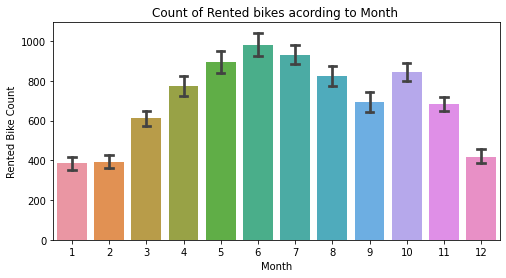

In [77]:
#Anlysis of data by vizualisation
plt.figure(figsize=(8,4))
sns.barplot(data=seoul_df,x='Month',y='Rented Bike Count', capsize=.2)
plt.title('Count of Rented bikes acording to Month ')
plt.show()

The number of rented bikes count is higher in the month of june compared to other months.

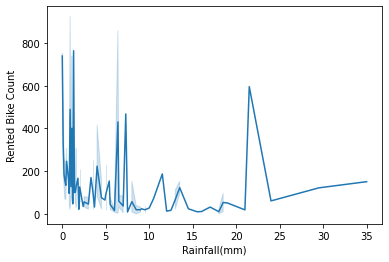

In [82]:
sns.lineplot(x='Rainfall(mm)', y='Rented Bike Count', data=seoul_df)

Text(0.5, 1.0, 'Heatmap')

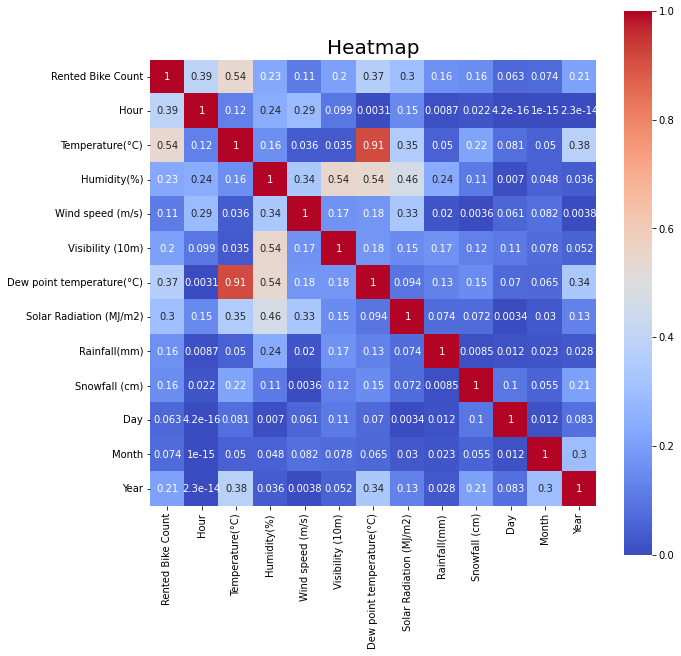

In [27]:
# finding the correlation using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(abs(seoul_df.corr()),cmap='coolwarm', annot=True, square=True)
plt.title('Heatmap',fontsize=(20))

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [32]:
# Defining a function to calculate VIF
def calc_vif(X):
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [37]:
# calculating vif
calc_vif(seoul_df[[i for i in seoul_df.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Hour,4.456946
1,Temperature(°C),188.757275
2,Humidity(%),187.140788
3,Wind speed (m/s),4.848147
4,Visibility (10m),10.695216
5,Dew point temperature(°C),127.016687
6,Solar Radiation (MJ/m2),2.909493
7,Rainfall(mm),1.103999
8,Snowfall (cm),1.152549
9,Day,4.420676


In [36]:
# calculating vif
calc_vif(seoul_df[[i for i in seoul_df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)','Year']]])

,variables,VIF
0,Hour,3.998419
1,Temperature(°C),3.236167
2,Humidity(%),6.757926
3,Wind speed (m/s),4.621365
4,Visibility (10m),5.455330
5,Solar Radiation (MJ/m2),2.280208
6,Rainfall(mm),1.081555
7,Snowfall (cm),1.136671
8,Day,3.849545
9,Month,4.603431


Great we have brought all the vif values around 5, thus handling the multicollinearity. VIF > 5 is cause for concern and VIF > 10 indicates a serious collinearity problem. 

### **Data Wrangling**

**Missing Values**

In [83]:
# create a copy to make changes in dataset
seoul_df_copy = seoul_df.copy()

In [84]:
# checking for missing values
print('The no. of missing values in each variable:\n',seoul_df_copy.isna().sum())

The no. of missing values in each variable:
 Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Day                          0
Month                        0
Year                         0
dtype: int64


We dont have any missing values in our dataset. We can proceed further.

**Outliers**

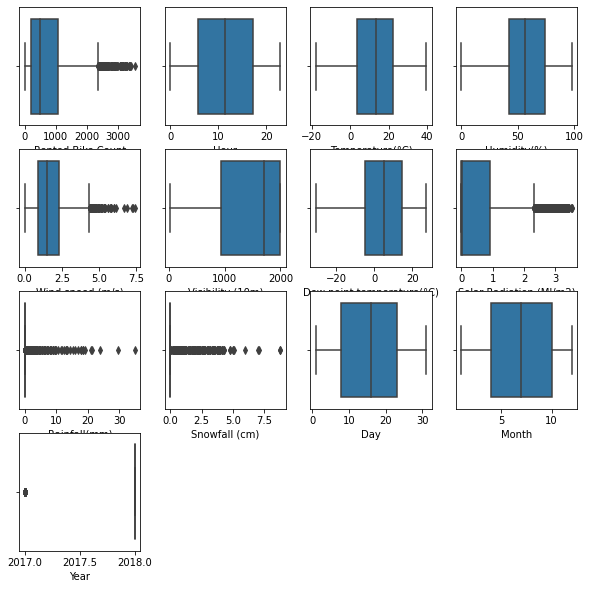

In [88]:
# looking for outliers using box plot
plt.figure(figsize=(10,10))
for index,item in enumerate([i for i in seoul_df_copy.describe().columns]):
  plt.subplot(4,4,index+1)
  sns.boxplot(seoul_df_copy[item])

* We have handled ouliers in our dv 'Rented bike count' by applying transformation.

* Wind speed and solar radiation have outliers but as they are not that far from the maximum values we will keep them.

**Transforming categorical variables into the numerical variables**

In [91]:
# Transforming the Holiday variable
seoul_df_copy['Holiday'] = seoul_df_copy['Holiday'].apply(lambda x: 1 if x=='Holiday' else 0)

In [95]:
# Mapping the Function Day variable
seoul_df_copy['Functioning Day'] = seoul_df_copy['Functioning Day'].map({'Yes':1, 'No':0})

In [98]:
seoul_df_copy['Functioning Day'].value_counts()

1    8465
0     295
Name: Functioning Day, dtype: int64

In [107]:
pd.set_option('display.max_rows', None)
seoul_df_copy[seoul_df_copy['Functioning Day'] == 0][['Rented Bike Count']]

,Rented Bike Count
3144,0
3145,0
3146,0
3147,0
3148,0
3149,0
3150,0
3151,0
3152,0
3153,0


In [108]:
# since there was no bike rented in the non functioning day we gonna drop the rows
seoul_df_copy = seoul_df_copy[seoul_df_copy['Functioning Day'] == 1]
seoul_df_copy.drop(['Functioning Day'], axis=1, inplace=True)

In [111]:
seoul_df_copy.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Day,Month,Year
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,12,1,2017
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,12,1,2017
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,12,1,2017
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,12,1,2017
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,12,1,2017


In [112]:
seoul_df_copy.shape

(8465, 16)

In [113]:
# one hot encoding the season variable
seoul_df_copy = pd.get_dummies(seoul_df_copy, columns=['Seasons'], drop_first=True)    # drop one of the dummies to avoid multicollinearity (dummy variable trap)

In [114]:
# removing columns
seoul_df_copy.drop(['Date','Year','Dew point temperature(°C)'], axis=1, inplace=True)

In [115]:
seoul_df_copy.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Day,Month,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,12,1,0,0,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,12,1,0,0,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,12,1,0,0,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,12,1,0,0,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,12,1,0,0,1


Now our dataframe is ready for the regression machine learning algorithms. 

In [116]:
seoul_df_copy.shape

(8465, 15)